In [2]:
# Trying a DenseNet
# Based off DenseNet-121 in Table 1,
# Densely Connected CNNs, Huang et. al.

# Use CIFAR-10 image database
import torch
import torchvision
import torchvision.transforms as transforms

# Normalize image pixel values from range [0, 1] to range [-1, 1]
# (from tutorial)
# TODO: normalize by channel mean and standard dev.
#       - can use torch.mean(input, 0) to get mean value of each channel,
#         and torch.std(input, 0) to get stand. dev. of each channel
#         (make sure 0 is the right dimension)
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True,
                                          num_workers=4)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=False,
                                         num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Files already downloaded and verified


Files already downloaded and verified


plane  deer truck   dog


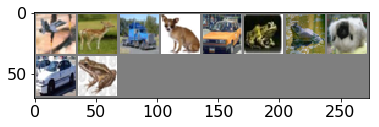

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

# function to show an image
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #axes 1, 2, 0

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images with labels
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# TODO: fix so only 4 images show


In [28]:
# Create the DenseNet

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class DenseNetTest(nn.Module):
    def __init__(self, k=4, k0=16, L=4, num_blocks=3):
        """
        Creates DenseNet with:
         - growth rate k,
         - k0 number of input channels in the input layer to the first dense block,
         - layers per block L,
         - num_blocks dense blocks
        Note: Growth-rate = number of output feature maps from each H_l,
        where H_l is the non-linear transformation within dense blocks
        """

        super(DenseNetTest, self).__init__()
        self.k = k
        self.k0 = k0
        self.L = L
        self.num_blocks = num_blocks

        # Keep layers in a list, then convert to a sequence at the end
        # (since PyTorch doesn't support appending to a nn.Sequential)
        layers = []

        # Initial convolution layer before first dense block
        layers.extend([nn.ZeroPad2d(1),
                      nn.Conv2d(in_channels=3,
                                out_channels=16,
                                kernel_size=3,
                                stride=2,
                                padding=1)
        ])

        for d in range(num_blocks):
            for l in range(L):
                # TODO: form dense blocks.
                # Concatenate input tensors here? In forward pass?
                # Make self.layers a field?

        def bottleneck(input_channels):
            """
            BN-ReLU-1x1 conv layer
            input_channels: the number of input channels,
            k: growth rate
            Produces 4k output feature maps
            """
            bn_sequence = [
                nn.BatchNorm2d(input_channels),
                nn.ReLU(),
                nn.conv2d(input_channels, 4*k, kernel_size=1, stride=1)
            ]
            return bn_sequence

        def H_l(input_channels, k0, k, l):
            """
            Bottleneck-BN-ReLU-3x3 conv
            x: input tensor
            input_channels: number of input channels,
            k0: number of channels in first layer,
            k: growth rate
            l: the number of the output layer in the dense block
            """
            h_l_sequence = nn.Sequential(
                bottleneck(input_channels, k),
                nn.BatchNorm2d(4*k),
                nn.ReLU(),
                nn.conv2d(4*k, k0 + k*(l-1), kernel_size=3, stride=1, padding=1)
                )
            return h_l_sequence(x)

        def transition(x, input_channels, k):
            """
            BN-ReLU-1x1 conv-2x2 average pooling, to be done at the end of
            each dense block
            x: input tensor
            input_channels: number of input channels
            k: growth rate
            """
            trans_sequence = nn.Sequential(
                nn.BatchNorm2d(input_channels),
                nn.ReLU(),
                nn.conv2d(input_channels, 4*k, kernel_size=1, stride=1),
                nn.AvgPool2d(2)
                )

            return trans_sequence(x)




In [31]:
net = DenseNetTest(k=3, L=3)


In [33]:
for i in range (3):
    print(i)

0
1
2
